# Example notebook for using teleparallel modified gravity class-code (class_tmg)

In [1]:
from classy import Class
import matplotlib.pylab as plt
import numpy as np

In [2]:
#savedir = '/home/mhashim/lustre_lrg/mhashim/WElHanafyProj_N5/Analysis/PrePlots/'

## 1: LCDM  (retain fiducial LCDM case) 

In [3]:
#LCDM:
model_lcdm = Class()
param_dict_lcdm =  {
    'Omega_fld':0,
    'Omega_scf':0,
    'Omega_T':0,
    'b':0,
    'lensing': 'yes',
    'output':'tCl,pCl,lCl,mPk,mTk', 
    'lensing':'yes',
    'P_k_max_1/Mpc':3.0,
    'l_switch_limber':9,
    'z_max_pk':1e3,
    'gauge':'newtonian',
    'temperature_contributions': 'tsw, eisw,  dop, pol, lisw'
    }
model_lcdm.set(param_dict_lcdm)
model_lcdm.compute()
bg_rslt_dict_lcdm= model_lcdm.get_background()
prt_rslt_dict_lcdm = model_lcdm.get_sources()

## 2: fTCDM  

In [15]:
# fT: main branch
model_fT = Class()
param_dict = {
    'Omega_Lambda':0,
    'Omega_fld':0,
    'Omega_scf':0,
    'Omega_T':-1,
    'b':1,
    'alpha':0.0,
    'root_method':'brent',
    'lmbrtbrnch':0, #labmert main branch
    'lensing': 'yes',
    'output':'tCl,pCl,lCl,mPk,mTk', 
    'lensing':'yes',
    'P_k_max_1/Mpc':3.0,
    'l_switch_limber':9,
    'z_max_pk':1e3,
    'gauge':'newtonian',
    'temperature_contributions': 'tsw, eisw,  dop, pol, lisw'
    }
model_fT.set(param_dict)
model_fT.compute()
bg_rslt_dict = model_fT.get_background()
prt_rslt_dict = model_fT.get_sources()

## Plotting: Background

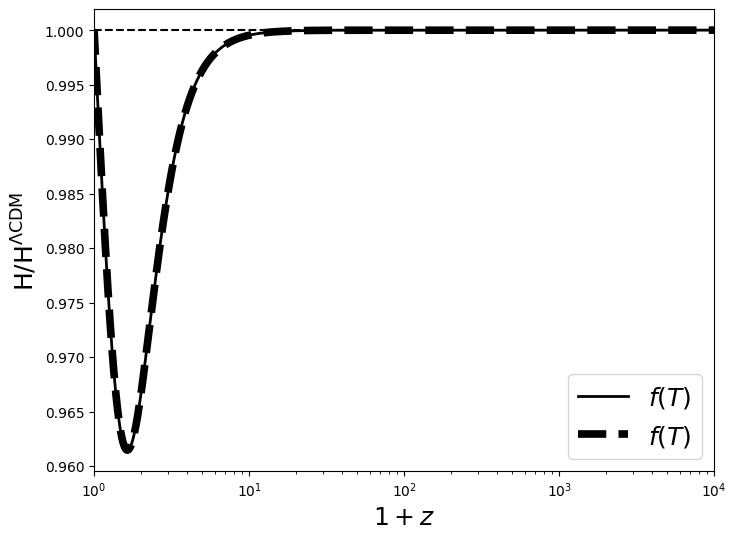

In [18]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.0, hspace=0.0)
model_fT.set({'root_method':'fixedpoint'})
model_fT.compute()
bg_rslt_dict = model_fT.get_background()
plt.semilogx(1+bg_rslt_dict['z'], bg_rslt_dict['H [1/Mpc]']/bg_rslt_dict_lcdm['H [1/Mpc]'], lw=2., ls ='-', c='k', label = r'$f(T)$')
model_fT.set({'root_method':'brent'})
model_fT.compute()
bg_rslt_dict = model_fT.get_background()
plt.semilogx(1+bg_rslt_dict['z'], bg_rslt_dict['H [1/Mpc]']/bg_rslt_dict_lcdm['H [1/Mpc]'], lw=5.5, ls ='--', c='k', label = r'$f(T)$')

#plt.semilogx(1+bg_rslt_dict_m1['z'], bg_rslt_dict_m1['H [1/Mpc]']/bg_rslt_dict_lcdm['H [1/Mpc]'], lw=2., ls ='--', c='b', label = r'$f(T): W_{-1}$')
#plt.text(1e4, 0.95, 'RUN 3', fontsize=18)
plt.legend(ncols=1, fontsize=18)
plt.axhline(1.0, lw=1.5, ls='--', c='k')
plt.xlim(1, 1e4)
#plt.ylim(0.999995, 1.0001)
plt.xlabel(r'$1+z$', fontsize=18)
plt.ylabel(r'$\rm H/H^{\Lambda CDM}$', fontsize=18)
#plt.savefig(savedir + 'Hubble_vs_z_fT_R_1.png', bbox_inches='tight')
plt.show()